<a href="https://colab.research.google.com/github/kdemertzis/Earthquakes/blob/main/Classification_ROW_FORM_BARE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret[full]
!pip install shap

In [2]:
"""
    Import library
"""
##-- PyCaret
import pycaret
from pycaret.classification import *
##-- Pandas
import pandas as pd
from pandas import Series, DataFrame
##-- Scikit-learn
import sklearn
import pandas as pd
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
url = 'https://raw.githubusercontent.com/kdemertzis/Earthquakes/main/1_3class.csv'
# load the dataset
df = pd.read_csv(url)

In [13]:
df

,HI,PGA,Vmax/amax,ASI,TSIGN,TBRAC,PP,CAV,SED,TUD,EPA,PGV,PGD,Ia,Htot,ecc_tot,Vw1,Vw2,class_3
0,34.69682,0.10302,0.12855,0.08556,18.66689,0.90507,0.24819,304.31962,440.05088,0.27157,0.08422,12.99187,9.37782,0.10914,9.6,0.00,0.00,0.00,A
1,112.31037,0.27556,0.10762,0.21103,20.29793,23.67931,0.40150,1097.23440,1376.04044,6.44857,0.21040,29.09237,9.60392,1.15625,9.6,0.00,0.00,0.00,C
2,54.36072,0.05061,0.25662,0.03496,44.63999,0.00000,1.09836,650.61521,786.00185,0.00000,0.03481,12.74285,11.32263,0.16481,9.6,0.00,0.00,0.00,A
3,49.97794,0.04931,0.24211,0.04257,27.66725,0.00000,1.03692,436.01942,518.85313,0.00000,0.04197,11.71184,5.70295,0.11592,9.6,0.00,0.00,0.00,A
4,145.98159,0.20528,0.17819,0.16116,14.28378,16.20496,0.96125,821.97453,3157.48763,5.02018,0.16156,35.88232,19.61064,0.89886,9.6,0.00,0.00,0.00,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,143.41546,0.30391,0.15066,0.23337,17.78367,17.44298,0.31812,882.93392,2651.05629,4.46360,0.23216,44.91805,18.90485,0.84282,22.4,5.96,0.59,0.67,C
1946,103.75376,0.19884,0.14020,0.21175,17.96602,21.21437,0.24739,1010.06525,2377.47394,6.33191,0.21011,27.34765,15.81769,0.96861,22.4,5.96,0.59,0.67,C
1947,68.04170,0.27918,0.06489,0.22260,14.30854,13.46066,0.21909,732.61930,487.70115,3.96085,0.22266,17.77163,3.81008,0.69162,22.4,5.96,0.59,0.67,B
1948,113.34270,0.38092,0.08905,0.37023,9.06208,11.58757,0.27713,1037.34587,1904.84573,5.50291,0.36474,33.27574,18.33504,1.67123,22.4,5.96,0.59,0.67,C


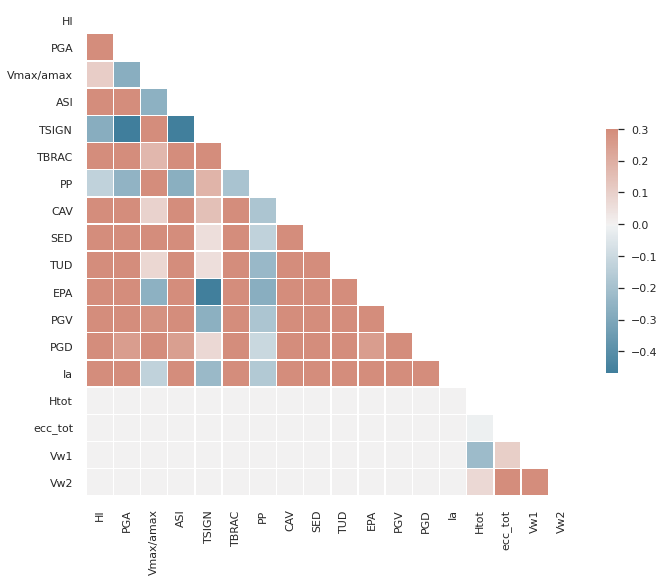

In [17]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


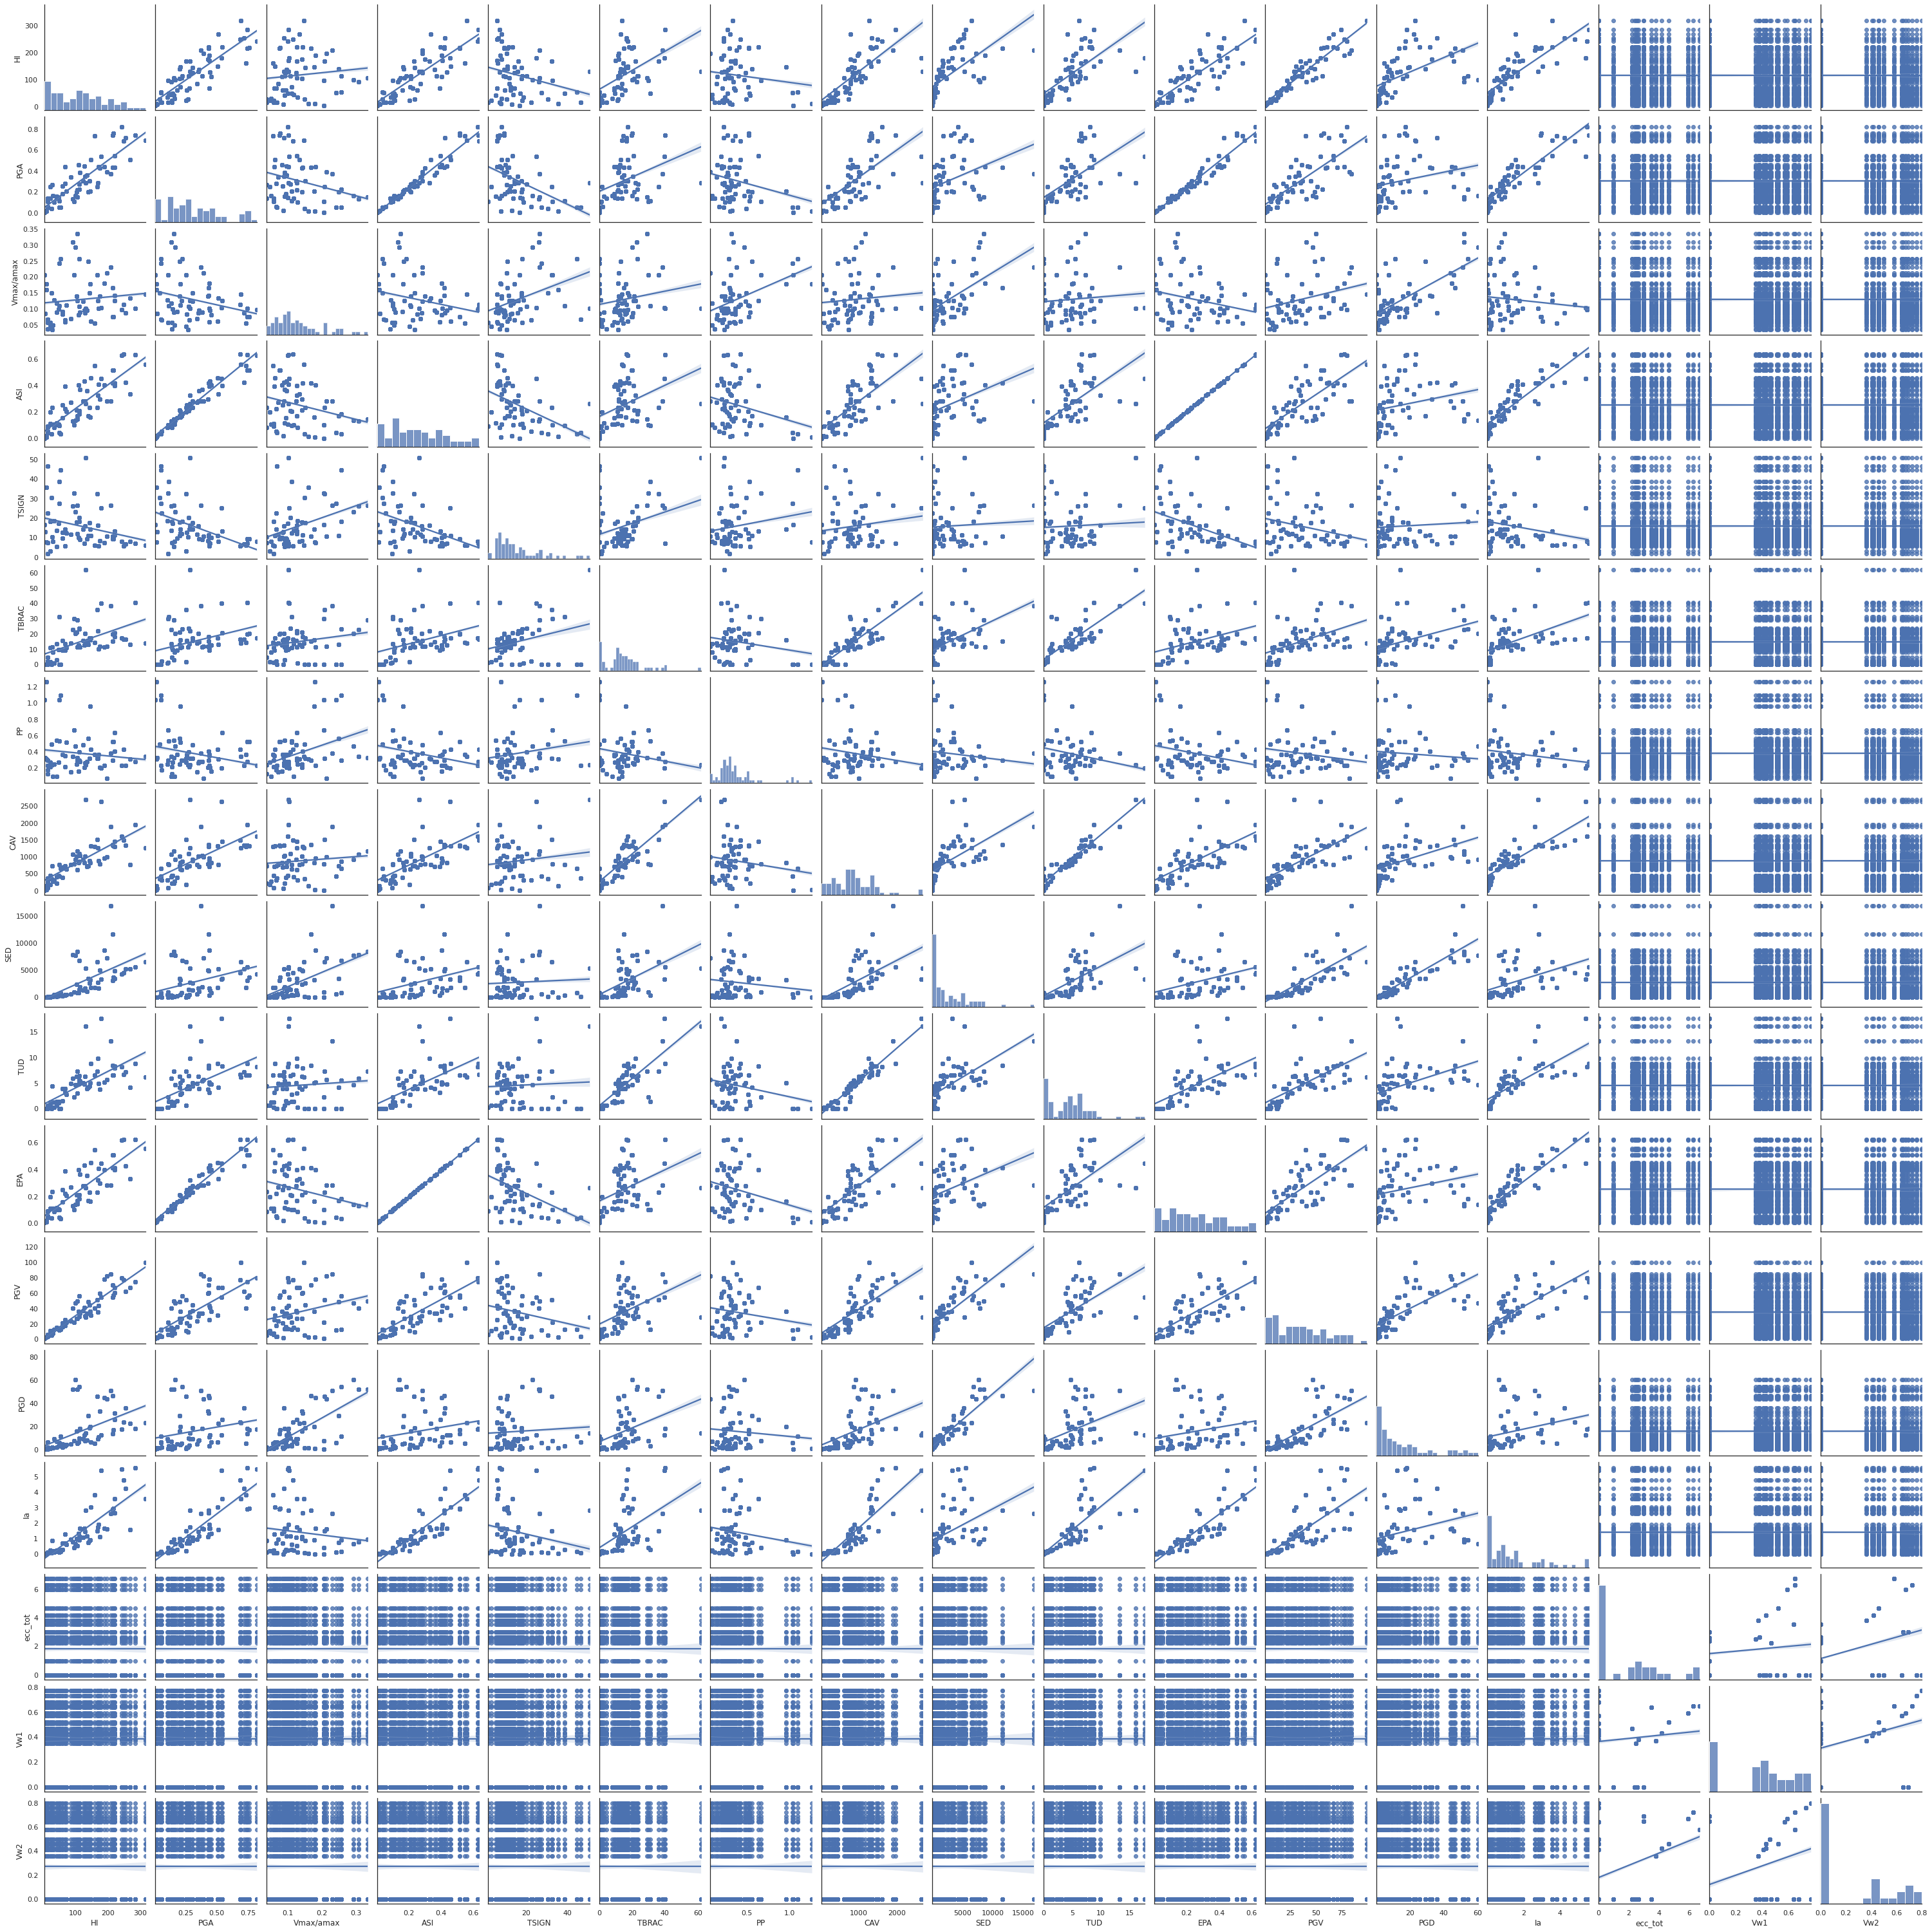

In [7]:
# with regression
sns.pairplot(df, kind="reg")
plt.show()

In [14]:
# setup the dataset
grid = setup(data=df, target=df.columns[-1], html=False, silent=True, verbose=False, combine_rare_levels = True, feature_selection = True)

In [15]:
df

,HI,PGA,Vmax/amax,ASI,TSIGN,TBRAC,PP,CAV,SED,TUD,EPA,PGV,PGD,Ia,Htot,ecc_tot,Vw1,Vw2,class_3
0,34.69682,0.10302,0.12855,0.08556,18.66689,0.90507,0.24819,304.31962,440.05088,0.27157,0.08422,12.99187,9.37782,0.10914,9.6,0.00,0.00,0.00,A
1,112.31037,0.27556,0.10762,0.21103,20.29793,23.67931,0.40150,1097.23440,1376.04044,6.44857,0.21040,29.09237,9.60392,1.15625,9.6,0.00,0.00,0.00,C
2,54.36072,0.05061,0.25662,0.03496,44.63999,0.00000,1.09836,650.61521,786.00185,0.00000,0.03481,12.74285,11.32263,0.16481,9.6,0.00,0.00,0.00,A
3,49.97794,0.04931,0.24211,0.04257,27.66725,0.00000,1.03692,436.01942,518.85313,0.00000,0.04197,11.71184,5.70295,0.11592,9.6,0.00,0.00,0.00,A
4,145.98159,0.20528,0.17819,0.16116,14.28378,16.20496,0.96125,821.97453,3157.48763,5.02018,0.16156,35.88232,19.61064,0.89886,9.6,0.00,0.00,0.00,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,143.41546,0.30391,0.15066,0.23337,17.78367,17.44298,0.31812,882.93392,2651.05629,4.46360,0.23216,44.91805,18.90485,0.84282,22.4,5.96,0.59,0.67,C
1946,103.75376,0.19884,0.14020,0.21175,17.96602,21.21437,0.24739,1010.06525,2377.47394,6.33191,0.21011,27.34765,15.81769,0.96861,22.4,5.96,0.59,0.67,C
1947,68.04170,0.27918,0.06489,0.22260,14.30854,13.46066,0.21909,732.61930,487.70115,3.96085,0.22266,17.77163,3.81008,0.69162,22.4,5.96,0.59,0.67,B
1948,113.34270,0.38092,0.08905,0.37023,9.06208,11.58757,0.27713,1037.34587,1904.84573,5.50291,0.36474,33.27574,18.33504,1.67123,22.4,5.96,0.59,0.67,C


In [20]:
# setup the dataset
grid = setup(data=df, target=df.columns[-1], html=False, silent=True, verbose=False, feature_selection = True, remove_outliers = True)

In [17]:
df

,HI,PGA,Vmax/amax,ASI,TSIGN,TBRAC,PP,CAV,SED,TUD,EPA,PGV,PGD,Ia,Htot,ecc_tot,Vw1,Vw2,class_3
0,34.69682,0.10302,0.12855,0.08556,18.66689,0.90507,0.24819,304.31962,440.05088,0.27157,0.08422,12.99187,9.37782,0.10914,9.6,0.00,0.00,0.00,A
1,112.31037,0.27556,0.10762,0.21103,20.29793,23.67931,0.40150,1097.23440,1376.04044,6.44857,0.21040,29.09237,9.60392,1.15625,9.6,0.00,0.00,0.00,C
2,54.36072,0.05061,0.25662,0.03496,44.63999,0.00000,1.09836,650.61521,786.00185,0.00000,0.03481,12.74285,11.32263,0.16481,9.6,0.00,0.00,0.00,A
3,49.97794,0.04931,0.24211,0.04257,27.66725,0.00000,1.03692,436.01942,518.85313,0.00000,0.04197,11.71184,5.70295,0.11592,9.6,0.00,0.00,0.00,A
4,145.98159,0.20528,0.17819,0.16116,14.28378,16.20496,0.96125,821.97453,3157.48763,5.02018,0.16156,35.88232,19.61064,0.89886,9.6,0.00,0.00,0.00,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,143.41546,0.30391,0.15066,0.23337,17.78367,17.44298,0.31812,882.93392,2651.05629,4.46360,0.23216,44.91805,18.90485,0.84282,22.4,5.96,0.59,0.67,C
1946,103.75376,0.19884,0.14020,0.21175,17.96602,21.21437,0.24739,1010.06525,2377.47394,6.33191,0.21011,27.34765,15.81769,0.96861,22.4,5.96,0.59,0.67,C
1947,68.04170,0.27918,0.06489,0.22260,14.30854,13.46066,0.21909,732.61930,487.70115,3.96085,0.22266,17.77163,3.81008,0.69162,22.4,5.96,0.59,0.67,B
1948,113.34270,0.38092,0.08905,0.37023,9.06208,11.58757,0.27713,1037.34587,1904.84573,5.50291,0.36474,33.27574,18.33504,1.67123,22.4,5.96,0.59,0.67,C


In [21]:
best = compare_models(cross_validation=True, n_select = 1, turbo=False) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.842,0.7555,0.7572,0.664


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.664
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.124


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.664
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.124
nb,Naive Bayes,0.7397,0.9279,0.7440,0.7899,0.7501,0.6093,0.6226,0.017


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.020
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.664
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.124
nb,Naive Bayes,0.7397,0.9279,0.7440,0.7899,0.7501,0.6093,0.6226,0.017


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.020
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.664
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.124
nb,Naive Bayes,0.7397,0.9279,0.7440,0.7899,0.7501,0.6093,0.6226,0.017
svm,SVM - Linear Kernel,0.6749,0.0000,0.5954,0.6296,0.6250,0.4658,0.5054,0.065


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.020
rbfsvm,SVM - Radial Kernel,0.8618,0.9433,0.8360,0.8599,0.8596,0.7820,0.7832,0.335
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.664
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.124
nb,Naive Bayes,0.7397,0.9279,0.7440,0.7899,0.7501,0.6093,0.6226,0.017
svm,SVM - Linear Kernel,0.6749,0.0000,0.5954,0.6296,0.6250,0.4658,0.5054,0.065


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.020
rbfsvm,SVM - Radial Kernel,0.8618,0.9433,0.8360,0.8599,0.8596,0.7820,0.7832,0.335
gpc,Gaussian Process Classifier,0.8610,0.9255,0.8416,0.8625,0.8608,0.7827,0.7836,2.660
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.664
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.124
nb,Naive Bayes,0.7397,0.9279,0.7440,0.7899,0.7501,0.6093,0.6226,0.017
svm,SVM - Linear Kernel,0.6749,0.0000,0.5954,0.6296,0.6250,0.4658,0.5054,0.065


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.020
rbfsvm,SVM - Radial Kernel,0.8618,0.9433,0.8360,0.8599,0.8596,0.7820,0.7832,0.335
gpc,Gaussian Process Classifier,0.8610,0.9255,0.8416,0.8625,0.8608,0.7827,0.7836,2.660
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.664
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.124
mlp,MLP Classifier,0.7713,0.9172,0.7376,0.7879,0.7577,0.6436,0.6577,0.269
nb,Naive Bayes,0.7397,0.9279,0.7440,0.7899,0.7501,0.6093,0.6226,0.017
svm,SVM - Linear Kernel,0.6749,0.0000,0.5954,0.6296,0.6250,0.4658,0.5054,0.065


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.020
rbfsvm,SVM - Radial Kernel,0.8618,0.9433,0.8360,0.8599,0.8596,0.7820,0.7832,0.335
gpc,Gaussian Process Classifier,0.8610,0.9255,0.8416,0.8625,0.8608,0.7827,0.7836,2.660
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.664
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.124
ridge,Ridge Classifier,0.8123,0.0000,0.7577,0.8065,0.7954,0.6994,0.7093,0.019
mlp,MLP Classifier,0.7713,0.9172,0.7376,0.7879,0.7577,0.6436,0.6577,0.269
nb,Naive Bayes,0.7397,0.9279,0.7440,0.7899,0.7501,0.6093,0.6226,0.017
svm,SVM - Linear Kernel,0.6749,0.0000,0.5954,0.6296,0.6250,0.4658,0.5054,0.065


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8788,0.9718,0.8603,0.8802,0.8781,0.8102,0.8114,0.527
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.020
rbfsvm,SVM - Radial Kernel,0.8618,0.9433,0.8360,0.8599,0.8596,0.7820,0.7832,0.335
gpc,Gaussian Process Classifier,0.8610,0.9255,0.8416,0.8625,0.8608,0.7827,0.7836,2.660
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.664
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.124
ridge,Ridge Classifier,0.8123,0.0000,0.7577,0.8065,0.7954,0.6994,0.7093,0.019
mlp,MLP Classifier,0.7713,0.9172,0.7376,0.7879,0.7577,0.6436,0.6577,0.269
nb,Naive Bayes,0.7397,0.9279,0.7440,0.7899,0.7501,0.6093,0.6226,0.017
svm,SVM - Linear Kernel,0.6749,0.0000,0.5954,0.6296,0.6250,0.4658,0.5054,0.065


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8788,0.9718,0.8603,0.8802,0.8781,0.8102,0.8114,0.527
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.020
rbfsvm,SVM - Radial Kernel,0.8618,0.9433,0.8360,0.8599,0.8596,0.7820,0.7832,0.335
gpc,Gaussian Process Classifier,0.8610,0.9255,0.8416,0.8625,0.8608,0.7827,0.7836,2.660
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.664
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.124
qda,Quadratic Discriminant Analysis,0.8154,0.9478,0.8175,0.8397,0.8193,0.7192,0.7273,0.018
ridge,Ridge Classifier,0.8123,0.0000,0.7577,0.8065,0.7954,0.6994,0.7093,0.019
mlp,MLP Classifier,0.7713,0.9172,0.7376,0.7879,0.7577,0.6436,0.6577,0.269
nb,Naive Bayes,0.7397,0.9279,0.7440,0.7899,0.7501,0.6093,0.6226,0.017


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8788,0.9718,0.8603,0.8802,0.8781,0.8102,0.8114,0.527
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.020
rbfsvm,SVM - Radial Kernel,0.8618,0.9433,0.8360,0.8599,0.8596,0.7820,0.7832,0.335
gpc,Gaussian Process Classifier,0.8610,0.9255,0.8416,0.8625,0.8608,0.7827,0.7836,2.660
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.664
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.124
qda,Quadratic Discriminant Analysis,0.8154,0.9478,0.8175,0.8397,0.8193,0.7192,0.7273,0.018
ridge,Ridge Classifier,0.8123,0.0000,0.7577,0.8065,0.7954,0.6994,0.7093,0.019
mlp,MLP Classifier,0.7713,0.9172,0.7376,0.7879,0.7577,0.6436,0.6577,0.269
ada,Ada Boost Classifier,0.7575,0.8247,0.7307,0.7845,0.7621,0.6247,0.6318,0.141


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8872,0.9773,0.8708,0.8895,0.8873,0.8236,0.8246,0.722
rf,Random Forest Classifier,0.8788,0.9718,0.8603,0.8802,0.8781,0.8102,0.8114,0.527
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.020
rbfsvm,SVM - Radial Kernel,0.8618,0.9433,0.8360,0.8599,0.8596,0.7820,0.7832,0.335
gpc,Gaussian Process Classifier,0.8610,0.9255,0.8416,0.8625,0.8608,0.7827,0.7836,2.660
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.664
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.124
qda,Quadratic Discriminant Analysis,0.8154,0.9478,0.8175,0.8397,0.8193,0.7192,0.7273,0.018
ridge,Ridge Classifier,0.8123,0.0000,0.7577,0.8065,0.7954,0.6994,0.7093,0.019
mlp,MLP Classifier,0.7713,0.9172,0.7376,0.7879,0.7577,0.6436,0.6577,0.269


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8872,0.9773,0.8708,0.8895,0.8873,0.8236,0.8246,0.722
rf,Random Forest Classifier,0.8788,0.9718,0.8603,0.8802,0.8781,0.8102,0.8114,0.527
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.020
rbfsvm,SVM - Radial Kernel,0.8618,0.9433,0.8360,0.8599,0.8596,0.7820,0.7832,0.335
gpc,Gaussian Process Classifier,0.8610,0.9255,0.8416,0.8625,0.8608,0.7827,0.7836,2.660
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.664
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.124
lda,Linear Discriminant Analysis,0.8292,0.9536,0.8109,0.8373,0.8313,0.7354,0.7373,0.019
qda,Quadratic Discriminant Analysis,0.8154,0.9478,0.8175,0.8397,0.8193,0.7192,0.7273,0.018
ridge,Ridge Classifier,0.8123,0.0000,0.7577,0.8065,0.7954,0.6994,0.7093,0.019


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8872,0.9773,0.8708,0.8895,0.8873,0.8236,0.8246,0.722
rf,Random Forest Classifier,0.8788,0.9718,0.8603,0.8802,0.8781,0.8102,0.8114,0.527
et,Extra Trees Classifier,0.8749,0.9678,0.8548,0.8753,0.8739,0.8039,0.8049,0.493
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.020
rbfsvm,SVM - Radial Kernel,0.8618,0.9433,0.8360,0.8599,0.8596,0.7820,0.7832,0.335
gpc,Gaussian Process Classifier,0.8610,0.9255,0.8416,0.8625,0.8608,0.7827,0.7836,2.660
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.664
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.124
lda,Linear Discriminant Analysis,0.8292,0.9536,0.8109,0.8373,0.8313,0.7354,0.7373,0.019
qda,Quadratic Discriminant Analysis,0.8154,0.9478,0.8175,0.8397,0.8193,0.7192,0.7273,0.018


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8872,0.9773,0.8708,0.8895,0.8873,0.8236,0.8246,0.722
xgboost,Extreme Gradient Boosting,0.8849,0.9761,0.8633,0.8844,0.8835,0.8193,0.8202,2.560
rf,Random Forest Classifier,0.8788,0.9718,0.8603,0.8802,0.8781,0.8102,0.8114,0.527
et,Extra Trees Classifier,0.8749,0.9678,0.8548,0.8753,0.8739,0.8039,0.8049,0.493
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.020
rbfsvm,SVM - Radial Kernel,0.8618,0.9433,0.8360,0.8599,0.8596,0.7820,0.7832,0.335
gpc,Gaussian Process Classifier,0.8610,0.9255,0.8416,0.8625,0.8608,0.7827,0.7836,2.660
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.664
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.124
lda,Linear Discriminant Analysis,0.8292,0.9536,0.8109,0.8373,0.8313,0.7354,0.7373,0.019


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8872,0.9773,0.8708,0.8895,0.8873,0.8236,0.8246,0.722
xgboost,Extreme Gradient Boosting,0.8849,0.9761,0.8633,0.8844,0.8835,0.8193,0.8202,2.560
lightgbm,Light Gradient Boosting Machine,0.8795,0.9756,0.8569,0.8785,0.8781,0.8107,0.8115,0.243
rf,Random Forest Classifier,0.8788,0.9718,0.8603,0.8802,0.8781,0.8102,0.8114,0.527
et,Extra Trees Classifier,0.8749,0.9678,0.8548,0.8753,0.8739,0.8039,0.8049,0.493
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.020
rbfsvm,SVM - Radial Kernel,0.8618,0.9433,0.8360,0.8599,0.8596,0.7820,0.7832,0.335
gpc,Gaussian Process Classifier,0.8610,0.9255,0.8416,0.8625,0.8608,0.7827,0.7836,2.660
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.664
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.124


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8880,0.9778,0.8678,0.8877,0.8870,0.8241,0.8249,4.142
gbc,Gradient Boosting Classifier,0.8872,0.9773,0.8708,0.8895,0.8873,0.8236,0.8246,0.722
xgboost,Extreme Gradient Boosting,0.8849,0.9761,0.8633,0.8844,0.8835,0.8193,0.8202,2.560
lightgbm,Light Gradient Boosting Machine,0.8795,0.9756,0.8569,0.8785,0.8781,0.8107,0.8115,0.243
rf,Random Forest Classifier,0.8788,0.9718,0.8603,0.8802,0.8781,0.8102,0.8114,0.527
et,Extra Trees Classifier,0.8749,0.9678,0.8548,0.8753,0.8739,0.8039,0.8049,0.493
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.020
rbfsvm,SVM - Radial Kernel,0.8618,0.9433,0.8360,0.8599,0.8596,0.7820,0.7832,0.335
gpc,Gaussian Process Classifier,0.8610,0.9255,0.8416,0.8625,0.8608,0.7827,0.7836,2.660
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.664


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8880,0.9778,0.8678,0.8877,0.8870,0.8241,0.8249,4.142
gbc,Gradient Boosting Classifier,0.8872,0.9773,0.8708,0.8895,0.8873,0.8236,0.8246,0.722
xgboost,Extreme Gradient Boosting,0.8849,0.9761,0.8633,0.8844,0.8835,0.8193,0.8202,2.560
lightgbm,Light Gradient Boosting Machine,0.8795,0.9756,0.8569,0.8785,0.8781,0.8107,0.8115,0.243
rf,Random Forest Classifier,0.8788,0.9718,0.8603,0.8802,0.8781,0.8102,0.8114,0.527
et,Extra Trees Classifier,0.8749,0.9678,0.8548,0.8753,0.8739,0.8039,0.8049,0.493
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.020
rbfsvm,SVM - Radial Kernel,0.8618,0.9433,0.8360,0.8599,0.8596,0.7820,0.7832,0.335
gpc,Gaussian Process Classifier,0.8610,0.9255,0.8416,0.8625,0.8608,0.7827,0.7836,2.660
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.664


In [23]:
calibrated_best = calibrate_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9154,0.9852,0.9111,0.9203,0.9168,0.8689,0.8700
1,0.8846,0.9748,0.8639,0.8834,0.8839,0.8189,0.8190
2,0.8769,0.9767,0.8528,0.8731,0.8739,0.8056,0.8066
3,0.9000,0.9782,0.8778,0.8975,0.8981,0.8425,0.8431
4,0.9231,0.9779,0.8944,0.9259,0.9188,0.8774,0.8819
5,0.8915,0.9768,0.8692,0.8892,0.8901,0.8289,0.8292
6,0.8915,0.9797,0.8829,0.8945,0.8927,0.8306,0.8308
7,0.8992,0.9857,0.8825,0.9006,0.8997,0.8419,0.8422
8,0.8450,0.9680,0.8217,0.8453,0.8450,0.7575,0.7576
9,0.8760,0.9741,0.8470,0.8732,0.8741,0.8050,0.8055


In [24]:
# compare all baseline models and select top 5
top5 = compare_models(n_select = 5) 
# tune top 5 base models
tuned_top5 = [tune_model(i) for i in top5]
# ensemble top 5 tuned models
bagged_top5 = [ensemble_model(i) for i in tuned_top5]
# blend top 5 base models 
blender = blend_models(estimator_list = top5) 
# select best model 
bestA = automl(optimize = 'Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.842,0.7555,0.7572,0.662


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.662
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.121


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.662
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.121
nb,Naive Bayes,0.7397,0.9279,0.7440,0.7899,0.7501,0.6093,0.6226,0.020


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.022
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.662
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.121
nb,Naive Bayes,0.7397,0.9279,0.7440,0.7899,0.7501,0.6093,0.6226,0.020


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.022
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.662
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.121
nb,Naive Bayes,0.7397,0.9279,0.7440,0.7899,0.7501,0.6093,0.6226,0.020
svm,SVM - Linear Kernel,0.6749,0.0000,0.5954,0.6296,0.6250,0.4658,0.5054,0.065


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.022
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.662
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.121
ridge,Ridge Classifier,0.8123,0.0000,0.7577,0.8065,0.7954,0.6994,0.7093,0.016
nb,Naive Bayes,0.7397,0.9279,0.7440,0.7899,0.7501,0.6093,0.6226,0.020
svm,SVM - Linear Kernel,0.6749,0.0000,0.5954,0.6296,0.6250,0.4658,0.5054,0.065


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8788,0.9718,0.8603,0.8802,0.8781,0.8102,0.8114,0.539
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.022
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.662
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.121
ridge,Ridge Classifier,0.8123,0.0000,0.7577,0.8065,0.7954,0.6994,0.7093,0.016
nb,Naive Bayes,0.7397,0.9279,0.7440,0.7899,0.7501,0.6093,0.6226,0.020
svm,SVM - Linear Kernel,0.6749,0.0000,0.5954,0.6296,0.6250,0.4658,0.5054,0.065


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8788,0.9718,0.8603,0.8802,0.8781,0.8102,0.8114,0.539
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.022
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.662
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.121
qda,Quadratic Discriminant Analysis,0.8154,0.9478,0.8175,0.8397,0.8193,0.7192,0.7273,0.019
ridge,Ridge Classifier,0.8123,0.0000,0.7577,0.8065,0.7954,0.6994,0.7093,0.016
nb,Naive Bayes,0.7397,0.9279,0.7440,0.7899,0.7501,0.6093,0.6226,0.020
svm,SVM - Linear Kernel,0.6749,0.0000,0.5954,0.6296,0.6250,0.4658,0.5054,0.065


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8788,0.9718,0.8603,0.8802,0.8781,0.8102,0.8114,0.539
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.022
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.662
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.121
qda,Quadratic Discriminant Analysis,0.8154,0.9478,0.8175,0.8397,0.8193,0.7192,0.7273,0.019
ridge,Ridge Classifier,0.8123,0.0000,0.7577,0.8065,0.7954,0.6994,0.7093,0.016
ada,Ada Boost Classifier,0.7575,0.8247,0.7307,0.7845,0.7621,0.6247,0.6318,0.145
nb,Naive Bayes,0.7397,0.9279,0.7440,0.7899,0.7501,0.6093,0.6226,0.020
svm,SVM - Linear Kernel,0.6749,0.0000,0.5954,0.6296,0.6250,0.4658,0.5054,0.065


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8872,0.9773,0.8708,0.8895,0.8873,0.8236,0.8246,0.724
rf,Random Forest Classifier,0.8788,0.9718,0.8603,0.8802,0.8781,0.8102,0.8114,0.539
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.022
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.662
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.121
qda,Quadratic Discriminant Analysis,0.8154,0.9478,0.8175,0.8397,0.8193,0.7192,0.7273,0.019
ridge,Ridge Classifier,0.8123,0.0000,0.7577,0.8065,0.7954,0.6994,0.7093,0.016
ada,Ada Boost Classifier,0.7575,0.8247,0.7307,0.7845,0.7621,0.6247,0.6318,0.145
nb,Naive Bayes,0.7397,0.9279,0.7440,0.7899,0.7501,0.6093,0.6226,0.020
svm,SVM - Linear Kernel,0.6749,0.0000,0.5954,0.6296,0.6250,0.4658,0.5054,0.065


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8872,0.9773,0.8708,0.8895,0.8873,0.8236,0.8246,0.724
rf,Random Forest Classifier,0.8788,0.9718,0.8603,0.8802,0.8781,0.8102,0.8114,0.539
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.022
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.662
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.121
lda,Linear Discriminant Analysis,0.8292,0.9536,0.8109,0.8373,0.8313,0.7354,0.7373,0.020
qda,Quadratic Discriminant Analysis,0.8154,0.9478,0.8175,0.8397,0.8193,0.7192,0.7273,0.019
ridge,Ridge Classifier,0.8123,0.0000,0.7577,0.8065,0.7954,0.6994,0.7093,0.016
ada,Ada Boost Classifier,0.7575,0.8247,0.7307,0.7845,0.7621,0.6247,0.6318,0.145
nb,Naive Bayes,0.7397,0.9279,0.7440,0.7899,0.7501,0.6093,0.6226,0.020


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8872,0.9773,0.8708,0.8895,0.8873,0.8236,0.8246,0.724
rf,Random Forest Classifier,0.8788,0.9718,0.8603,0.8802,0.8781,0.8102,0.8114,0.539
et,Extra Trees Classifier,0.8749,0.9678,0.8548,0.8753,0.8739,0.8039,0.8049,0.494
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.022
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.662
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.121
lda,Linear Discriminant Analysis,0.8292,0.9536,0.8109,0.8373,0.8313,0.7354,0.7373,0.020
qda,Quadratic Discriminant Analysis,0.8154,0.9478,0.8175,0.8397,0.8193,0.7192,0.7273,0.019
ridge,Ridge Classifier,0.8123,0.0000,0.7577,0.8065,0.7954,0.6994,0.7093,0.016
ada,Ada Boost Classifier,0.7575,0.8247,0.7307,0.7845,0.7621,0.6247,0.6318,0.145


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8872,0.9773,0.8708,0.8895,0.8873,0.8236,0.8246,0.724
xgboost,Extreme Gradient Boosting,0.8849,0.9761,0.8633,0.8844,0.8835,0.8193,0.8202,1.473
rf,Random Forest Classifier,0.8788,0.9718,0.8603,0.8802,0.8781,0.8102,0.8114,0.539
et,Extra Trees Classifier,0.8749,0.9678,0.8548,0.8753,0.8739,0.8039,0.8049,0.494
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.022
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.662
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.121
lda,Linear Discriminant Analysis,0.8292,0.9536,0.8109,0.8373,0.8313,0.7354,0.7373,0.020
qda,Quadratic Discriminant Analysis,0.8154,0.9478,0.8175,0.8397,0.8193,0.7192,0.7273,0.019
ridge,Ridge Classifier,0.8123,0.0000,0.7577,0.8065,0.7954,0.6994,0.7093,0.016


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8872,0.9773,0.8708,0.8895,0.8873,0.8236,0.8246,0.724
xgboost,Extreme Gradient Boosting,0.8849,0.9761,0.8633,0.8844,0.8835,0.8193,0.8202,1.473
lightgbm,Light Gradient Boosting Machine,0.8795,0.9756,0.8569,0.8785,0.8781,0.8107,0.8115,0.202
rf,Random Forest Classifier,0.8788,0.9718,0.8603,0.8802,0.8781,0.8102,0.8114,0.539
et,Extra Trees Classifier,0.8749,0.9678,0.8548,0.8753,0.8739,0.8039,0.8049,0.494
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.022
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.662
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.121
lda,Linear Discriminant Analysis,0.8292,0.9536,0.8109,0.8373,0.8313,0.7354,0.7373,0.020
qda,Quadratic Discriminant Analysis,0.8154,0.9478,0.8175,0.8397,0.8193,0.7192,0.7273,0.019


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8880,0.9778,0.8678,0.8877,0.8870,0.8241,0.8249,4.728
gbc,Gradient Boosting Classifier,0.8872,0.9773,0.8708,0.8895,0.8873,0.8236,0.8246,0.724
xgboost,Extreme Gradient Boosting,0.8849,0.9761,0.8633,0.8844,0.8835,0.8193,0.8202,1.473
lightgbm,Light Gradient Boosting Machine,0.8795,0.9756,0.8569,0.8785,0.8781,0.8107,0.8115,0.202
rf,Random Forest Classifier,0.8788,0.9718,0.8603,0.8802,0.8781,0.8102,0.8114,0.539
et,Extra Trees Classifier,0.8749,0.9678,0.8548,0.8753,0.8739,0.8039,0.8049,0.494
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.022
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.662
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.121
lda,Linear Discriminant Analysis,0.8292,0.9536,0.8109,0.8373,0.8313,0.7354,0.7373,0.020


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8880,0.9778,0.8678,0.8877,0.8870,0.8241,0.8249,4.728
gbc,Gradient Boosting Classifier,0.8872,0.9773,0.8708,0.8895,0.8873,0.8236,0.8246,0.724
xgboost,Extreme Gradient Boosting,0.8849,0.9761,0.8633,0.8844,0.8835,0.8193,0.8202,1.473
lightgbm,Light Gradient Boosting Machine,0.8795,0.9756,0.8569,0.8785,0.8781,0.8107,0.8115,0.202
rf,Random Forest Classifier,0.8788,0.9718,0.8603,0.8802,0.8781,0.8102,0.8114,0.539
et,Extra Trees Classifier,0.8749,0.9678,0.8548,0.8753,0.8739,0.8039,0.8049,0.494
dt,Decision Tree Classifier,0.8664,0.8993,0.8453,0.8668,0.8660,0.7907,0.7914,0.022
lr,Logistic Regression,0.8448,0.9447,0.8196,0.8431,0.8420,0.7555,0.7572,0.662
knn,K Neighbors Classifier,0.8370,0.9440,0.8083,0.8351,0.8344,0.7434,0.7450,0.121
lda,Linear Discriminant Analysis,0.8292,0.9536,0.8109,0.8373,0.8313,0.7354,0.7373,0.020


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklea

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9231,0.9852,0.9111,0.9243,0.9234,0.8801,0.8804
1,0.8923,0.9823,0.8722,0.8902,0.8910,0.8309,0.8311
2,0.8846,0.9817,0.8528,0.8811,0.8791,0.8166,0.8197
3,0.9000,0.9773,0.8806,0.8979,0.8981,0.8431,0.8438
4,0.9231,0.9767,0.8944,0.9259,0.9188,0.8774,0.8819
5,0.9070,0.9784,0.8862,0.9056,0.9059,0.8537,0.8540
6,0.9070,0.9828,0.9081,0.9133,0.9085,0.8561,0.8579
7,0.8992,0.9797,0.8880,0.9042,0.9008,0.8425,0.8432
8,0.8682,0.9681,0.8522,0.8698,0.8689,0.7948,0.7949
9,0.8605,0.9758,0.8440,0.8681,0.8632,0.7834,0.7843


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9000,0.9806,0.8833,0.9006,0.8997,0.8440,0.8445
1,0.9077,0.9780,0.8889,0.9064,0.9067,0.8553,0.8556
2,0.9077,0.9749,0.8778,0.9084,0.9026,0.8528,0.8573
3,0.8923,0.9788,0.8611,0.8890,0.8879,0.8293,0.8316
4,0.8923,0.9722,0.8583,0.8934,0.8860,0.8285,0.8335
5,0.8527,0.9716,0.8148,0.8460,0.8476,0.7658,0.7674
6,0.9070,0.9837,0.8970,0.9070,0.9070,0.8542,0.8542
7,0.8682,0.9727,0.8491,0.8699,0.8689,0.7937,0.7938
8,0.8605,0.9633,0.8356,0.8578,0.8588,0.7810,0.7813
9,0.9147,0.9728,0.8970,0.9140,0.9141,0.8663,0.8665


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.7min finished


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9077,0.9860,0.8944,0.9100,0.9082,0.8564,0.8571
1,0.8846,0.9819,0.8667,0.8833,0.8839,0.8193,0.8194
2,0.8615,0.9752,0.8306,0.8554,0.8560,0.7805,0.7826
3,0.8923,0.9747,0.8583,0.8909,0.8863,0.8293,0.8332
4,0.9308,0.9789,0.9056,0.9327,0.9275,0.8899,0.8934
5,0.8682,0.9730,0.8438,0.8668,0.8674,0.7925,0.7926
6,0.9225,0.9863,0.9218,0.9278,0.9241,0.8797,0.8807
7,0.9147,0.9832,0.9047,0.9190,0.9160,0.8667,0.8675
8,0.8527,0.9688,0.8355,0.8586,0.8551,0.7711,0.7716
9,0.8760,0.9744,0.8553,0.8799,0.8769,0.8061,0.8070


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.2s


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.3s finished


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9077,0.9848,0.8944,0.9069,0.9072,0.8554,0.8555
1,0.9000,0.9813,0.8861,0.8990,0.8992,0.8437,0.8439
2,0.8846,0.9749,0.8556,0.8807,0.8789,0.8169,0.8199
3,0.8846,0.9708,0.8639,0.8828,0.8830,0.8186,0.8191
4,0.8923,0.9737,0.8611,0.8914,0.8878,0.8285,0.8320
5,0.8915,0.9719,0.8692,0.8892,0.8901,0.8289,0.8292
6,0.9147,0.9847,0.9162,0.9229,0.9168,0.8682,0.8703
7,0.8915,0.9729,0.8799,0.8944,0.8927,0.8306,0.8308
8,0.8605,0.9696,0.8520,0.8680,0.8633,0.7841,0.7851
9,0.8682,0.9714,0.8551,0.8756,0.8705,0.7950,0.7962


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   50.9s finished


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8923,0.9725,0.8750,0.8936,0.8927,0.8321,0.8324
1,0.9000,0.9693,0.8833,0.8995,0.8995,0.8437,0.8439
2,0.8923,0.9748,0.8611,0.8903,0.8861,0.8286,0.8327
3,0.8846,0.9780,0.8583,0.8815,0.8824,0.8183,0.8188
4,0.8923,0.9659,0.8556,0.8903,0.8861,0.8283,0.8326
5,0.8605,0.9673,0.8263,0.8551,0.8567,0.7788,0.7798
6,0.9225,0.9800,0.9192,0.9246,0.9232,0.8792,0.8796
7,0.8682,0.9631,0.8491,0.8699,0.8689,0.7937,0.7938
8,0.8372,0.9587,0.8105,0.8354,0.8363,0.7452,0.7453
9,0.9225,0.9706,0.9136,0.9250,0.9233,0.8792,0.8795


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9000,0.9829,0.8889,0.9039,0.9010,0.8448,0.8458
1,0.9000,0.9812,0.8833,0.8990,0.8994,0.8434,0.8435
2,0.8846,0.9816,0.8528,0.8811,0.8791,0.8166,0.8197
3,0.9000,0.9811,0.8861,0.9000,0.8990,0.8438,0.8447
4,0.9077,0.9764,0.8778,0.9116,0.9025,0.8527,0.8581
5,0.8915,0.9770,0.8632,0.8880,0.8885,0.8283,0.8292
6,0.8915,0.9817,0.8859,0.8941,0.8923,0.8312,0.8318
7,0.8682,0.9783,0.8603,0.8779,0.8716,0.7956,0.7970
8,0.8527,0.9656,0.8355,0.8544,0.8535,0.7707,0.7708
9,0.8760,0.9739,0.8607,0.8828,0.8783,0.8074,0.8084


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8846,0.9767,0.8694,0.8854,0.8845,0.8199,0.8205
1,0.9000,0.9747,0.8833,0.8995,0.8995,0.8437,0.8439
2,0.9000,0.9734,0.8667,0.9006,0.8934,0.8404,0.8457
3,0.9000,0.9785,0.8778,0.8985,0.8979,0.8426,0.8437
4,0.8769,0.9678,0.8389,0.8753,0.8695,0.8036,0.8087
5,0.8527,0.9703,0.8148,0.8460,0.8476,0.7658,0.7674
6,0.8915,0.9830,0.8748,0.8899,0.8904,0.8290,0.8293
7,0.8760,0.9690,0.8547,0.8760,0.8759,0.8053,0.8053
8,0.8527,0.9609,0.8273,0.8511,0.8518,0.7694,0.7695
9,0.9147,0.9692,0.9025,0.9163,0.9153,0.8668,0.8670


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9000,0.9822,0.8889,0.9039,0.9010,0.8448,0.8458
1,0.8923,0.9802,0.8778,0.8923,0.8923,0.8318,0.8319
2,0.8846,0.9783,0.8583,0.8806,0.8808,0.8176,0.8191
3,0.8846,0.9786,0.8667,0.8835,0.8834,0.8194,0.8200
4,0.9077,0.9780,0.8778,0.9113,0.9023,0.8530,0.8581
5,0.8837,0.9751,0.8577,0.8805,0.8814,0.8165,0.8171
6,0.9070,0.9849,0.8970,0.9073,0.9068,0.8548,0.8551
7,0.8992,0.9788,0.8880,0.9036,0.9008,0.8428,0.8434
8,0.8605,0.9675,0.8439,0.8640,0.8620,0.7830,0.7832
9,0.8837,0.9760,0.8718,0.8927,0.8863,0.8196,0.8213


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9000,0.9827,0.8889,0.9007,0.9000,0.8441,0.8444
1,0.8846,0.9797,0.8722,0.8861,0.8851,0.8203,0.8205
2,0.8923,0.9793,0.8694,0.8890,0.8895,0.8302,0.8312
3,0.8846,0.9724,0.8722,0.8861,0.8847,0.8204,0.8211
4,0.8923,0.9754,0.8611,0.8909,0.8877,0.8288,0.8320
5,0.8915,0.9748,0.8664,0.8893,0.8900,0.8286,0.8290
6,0.9225,0.9838,0.9248,0.9285,0.9239,0.8801,0.8819
7,0.8915,0.9731,0.8769,0.8945,0.8926,0.8302,0.8305
8,0.8450,0.9677,0.8271,0.8489,0.8467,0.7589,0.7591
9,0.8760,0.9674,0.8606,0.8795,0.8774,0.8067,0.8070


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8769,0.9714,0.8639,0.8789,0.8773,0.8085,0.8092
1,0.8923,0.9734,0.8722,0.8905,0.8910,0.8312,0.8315
2,0.8923,0.9715,0.8611,0.8903,0.8861,0.8286,0.8327
3,0.8769,0.9787,0.8611,0.8773,0.8768,0.8081,0.8084
4,0.8769,0.9629,0.8389,0.8753,0.8695,0.8036,0.8087
5,0.8527,0.9676,0.8148,0.8460,0.8476,0.7658,0.7674
6,0.8992,0.9814,0.8859,0.8984,0.8987,0.8416,0.8417
7,0.8527,0.9645,0.8380,0.8585,0.8551,0.7707,0.7712
8,0.8450,0.9583,0.8217,0.8452,0.8450,0.7584,0.7585
9,0.9070,0.9665,0.8996,0.9132,0.9089,0.8556,0.8566


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9154,0.9848,0.9056,0.9179,0.9161,0.8684,0.8690
1,0.8769,0.9805,0.8528,0.8745,0.8754,0.8067,0.8069
2,0.8769,0.9731,0.8472,0.8723,0.8719,0.8049,0.8071
3,0.9000,0.9775,0.8750,0.8972,0.8967,0.8422,0.8437
4,0.9231,0.9766,0.8944,0.9259,0.9188,0.8774,0.8819
5,0.8915,0.9739,0.8692,0.8892,0.8901,0.8289,0.8292
6,0.8837,0.9833,0.8718,0.8852,0.8843,0.8187,0.8189
7,0.9070,0.9828,0.8936,0.9102,0.9079,0.8542,0.8548
8,0.8527,0.9678,0.8355,0.8586,0.8551,0.7711,0.7716
9,0.8682,0.9749,0.8442,0.8694,0.8685,0.7941,0.7943


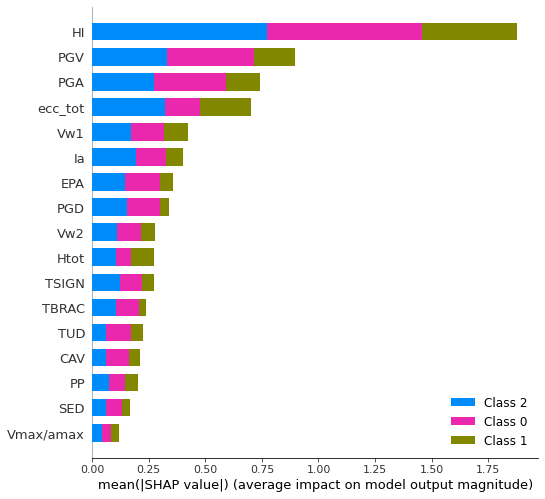

In [25]:
interpret_model(bestA)

In [26]:
evaluate_model(bestA)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…